## Chipotle快餐数据

In [3]:
# 1.导入数据
import pandas as pd
chipotle = pd.read_csv("chipotle.tsv",sep='\t')

In [5]:
# 2.查看前10行内容
print(chipotle.head(10))

   order_id  quantity                              item_name  \
0         1         1           Chips and Fresh Tomato Salsa   
1         1         1                                   Izze   
2         1         1                       Nantucket Nectar   
3         1         1  Chips and Tomatillo-Green Chili Salsa   
4         2         2                           Chicken Bowl   
5         3         1                           Chicken Bowl   
6         3         1                          Side of Chips   
7         4         1                          Steak Burrito   
8         4         1                       Steak Soft Tacos   
9         5         1                          Steak Burrito   

                                  choice_description item_price  
0                                                NaN     $2.39   
1                                       [Clementine]     $3.39   
2                                            [Apple]     $3.39   
3                              

In [11]:
# 3.打印出该数据的列数
print(chipotle.shape[1])

5


In [6]:
# 4.打印出全部列的名称
print(chipotle.columns)


Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')


In [12]:
# 5.找出下单数最多的 item
chipotle["item_name"].value_counts().head(1)

Chicken Bowl    726
Name: item_name, dtype: int64

In [13]:
# 6.打印出 item_name 的数量
num = chipotle.groupby(by = 'item_name').agg({'item_name':'count'}).shape[0]
print(num)

50


In [14]:
# 7.找出在 choice_description 中，下单次数最多的商品
print(chipotle['choice_description'].value_counts( ).head( ))

[Diet Coke]                                                                          134
[Coke]                                                                               123
[Sprite]                                                                              77
[Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream, Lettuce]]                42
[Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream, Guacamole, Lettuce]]     40
Name: choice_description, dtype: int64


In [15]:
# 8.打印出商品被下单的总数
sum = chipotle["quantity"].sum( )
print(sum)

4972


In [26]:
# 9.打印出在该数据集对应的时期内的收入(revenue)数额
print(chipotle["item_price"].str[1:])
print(chipotle["item_price"].str[1:].astype(float))
chipotle["item_price"]=chipotle["item_price"].str[1:].astype(float)
chipotle['sub_total']=round(chipotle['item_price']*chipotle['quantity'],2)
chipotle['sub_total'].sum()

0        2.39 
1        3.39 
2        3.39 
3        2.39 
4       16.98 
         ...  
4617    11.75 
4618    11.75 
4619    11.25 
4620     8.75 
4621     8.75 
Name: item_price, Length: 4622, dtype: object
0        2.39
1        3.39
2        3.39
3        2.39
4       16.98
        ...  
4617    11.75
4618    11.75
4619    11.25
4620     8.75
4621     8.75
Name: item_price, Length: 4622, dtype: float64


39237.02

In [22]:
# 10.打印出在该数据集对应的时期内的订单(order)数
print(chipotle["order_id"].unique( ).size)

1834


In [27]:
# 11.打印出每一笔订单的平均总价
a = chipotle[['order_id', 'sub_total']].groupby(by=['order_id']).agg({'sub_total': 'sum'})['sub_total'].mean( )
print (a)


21.394231188658654


## drinks数据

In [50]:
# 1.导入数据，查看头
import pandas as pd
drinks = pd.read_csv("drinks.csv")
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [51]:
# 2.计算得到：哪个大陆(continent)平均消耗的啤酒(beer)更多？
avg = drinks.groupby(by='continent').agg({'beer_servings':'mean'})
print(avg)
print(avg.max)
print(avg.idxmax())

           beer_servings
continent               
AF             61.471698
AS             37.045455
EU            193.777778
OC             89.687500
SA            175.083333
<bound method NDFrame._add_numeric_operations.<locals>.max of            beer_servings
continent               
AF             61.471698
AS             37.045455
EU            193.777778
OC             89.687500
SA            175.083333>
beer_servings    EU
dtype: object


In [52]:
# 3.打印出每个大陆(continent)的红酒消耗(wine_servings)的描述性统计值
print(drinks.groupby('continent')['wine_servings'].describe())

           count        mean        std  min   25%    50%     75%    max
continent                                                               
AF          53.0   16.264151  38.846419  0.0   1.0    2.0   13.00  233.0
AS          44.0    9.068182  21.667034  0.0   0.0    1.0    8.00  123.0
EU          45.0  142.222222  97.421738  0.0  59.0  128.0  195.00  370.0
OC          16.0   35.625000  64.555790  0.0   1.0    8.5   23.25  212.0
SA          12.0   62.416667  88.620189  1.0   3.0   12.0   98.50  221.0


In [53]:
# 4.打印出每个大陆每种酒类别的消耗平均值
mean=drinks.groupby('continent').mean()
print(mean)
print(drinks.groupby('continent').agg('mean'))

           beer_servings  spirit_servings  wine_servings  \
continent                                                  
AF             61.471698        16.339623      16.264151   
AS             37.045455        60.840909       9.068182   
EU            193.777778       132.555556     142.222222   
OC             89.687500        58.437500      35.625000   
SA            175.083333       114.750000      62.416667   

           total_litres_of_pure_alcohol  
continent                                
AF                             3.007547  
AS                             2.170455  
EU                             8.617778  
OC                             3.381250  
SA                             6.308333  
           beer_servings  spirit_servings  wine_servings  \
continent                                                  
AF             61.471698        16.339623      16.264151   
AS             37.045455        60.840909       9.068182   
EU            193.777778       132.555556    

In [54]:
# 5.打印出每个大陆对spirit饮品消耗的平均值，最大值和最小值
print(drinks.groupby('continent').agg({'spirit_servings':['mean','max','min']}))

          spirit_servings         
                     mean  max min
continent                         
AF              16.339623  152   0
AS              60.840909  326   0
EU             132.555556  373   0
OC              58.437500  254   0
SA             114.750000  302  25


## Titanic数据

In [56]:
# 1.导入数据
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
titanic = pd.read_csv('titanic.csv')

In [57]:
# 2.将 PassengerId 设置为索引
titanic = titanic.set_index('PassengerId')

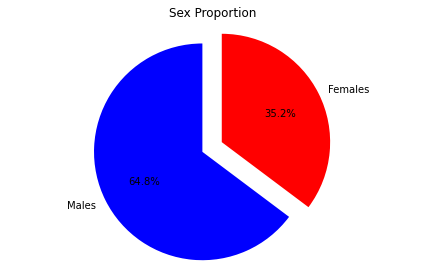

In [58]:
# 3.绘制一个展示男女乘客比例的扇形图
males = (titanic['Sex'] == 'male').sum( )
females = (titanic['Sex'] == 'female').sum( )
proportions = [males, females]
plt. pie(
   proportions,
   labels = ['Males', 'Females'],
   shadow = False,
   colors = ['blue', 'red'],
explode = (0.20, 0),
startangle = 90,
autopct = '%1.1f%%'
)
plt.axis('equal')
plt.title("Sex Proportion")
plt.tight_layout( )
plt.show( )

(-5.0, 90.0)

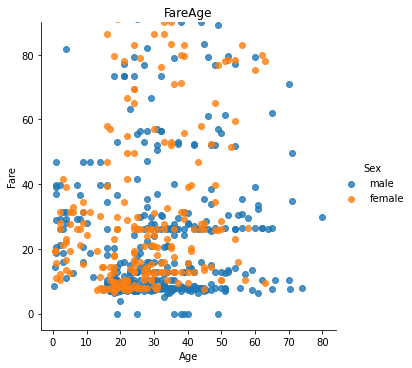

In [59]:
# 4.绘制一个展示船票 Fare, 与乘客年龄和性别的散点图
lm = sns.lmplot(x='Age', y='Fare', data=titanic, hue='Sex', fit_reg=False)
lm.set(title = 'FareAge')
axes = lm.axes
axes[0,0].set_ylim(-5, )
axes[0,0].set_ylim(-5, 90)

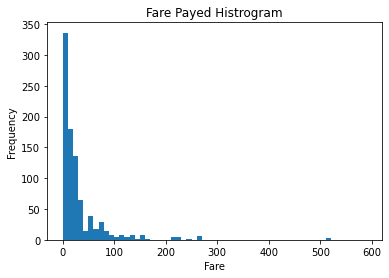

In [60]:
# 5.绘制一个展示船票价格的直方图
df = titanic.Fare.sort_values(ascending = False)
df
binsVal = np.arange(0, 600, 10)
binsVal
plt.hist ( df, bins=binsVal )
plt.xlabel ('Fare')
plt.ylabel ('Frequency')
plt.title ('Fare Payed Histrogram')
plt.show( )

In [61]:
# 6.有多少人生还？
titanic.Survived.sum( )

342